# Deep Learning HW 3
Use Batch Norm and Data Augmentation to improve both the CIFAR-10 training and test accuracies for CNN models greater than 90%.

In [18]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers, models

2.14.0


In [19]:
import numpy as np

class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None

    def load(self):
        data = [unpickle(f) for f in self._source]
        # print(data)
        images = np.vstack([d[b"data"] for d in data])
        n = len(images)  # 32 x 32 x 3 channels
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
        self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
        return self

    def next_batch(self, batch_size):
        x, y = self.images[self._i : self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y

In [20]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

##  Go to this URL in a browser: https://accounts.google.com/o/oauth2/......
##  Enter your authorization code:
##   ··········
##  Mounted at /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"
##  Loading CIFAR-10 dataset from your Google Drive
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [22]:
import pickle
import os

##  Loading CIFAR-10 dataset from your Google Drive
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

##  < for CIFAR-10 dataset on local host >
##  DATA_PATH = "./cifar-10-batches-py"

def unpickle(file):
    with open(os.path.join(DATA_PATH, file), 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')   ##  encoding='bytes'
    return dict

def one_hot(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [23]:
class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i)
                                   for i in range(1, 6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

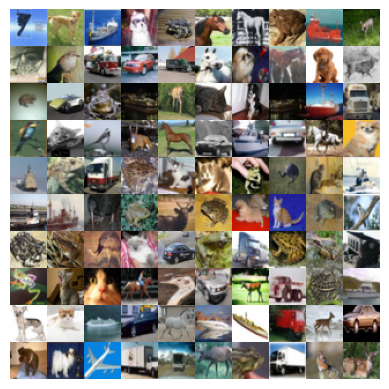

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
         for i in range(size)])
    plt.imshow(im)
    plt.show()

cifar = CifarDataManager()  # Loading CIFAR-10 dataset
images = cifar.train.images
display_cifar(images, 10)

In [25]:
print("Number of train images: {}".format(len(cifar.train.images)))
print("Number of train labels: {}".format(len(cifar.train.labels)))
print("Number of test images: {}".format(len(cifar.test.images)))
print("Number of test images: {}".format(len(cifar.test.labels)))

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test images: 10000


In [26]:
print("Train images: {}".format(cifar.train.images.shape))
print("Train labels: {}".format(cifar.train.labels.shape))
print(" Test images: {}".format(cifar.test.images.shape))
print(" Test labels: {}".format(cifar.test.labels.shape))

Train images: (50000, 32, 32, 3)
Train labels: (50000, 10)
 Test images: (10000, 32, 32, 3)
 Test labels: (10000, 10)


In [27]:
model = models.Sequential()

# 1st (Conv Layer + Batch Norm) * 3 + MaxPooling Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',
            padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 2nd (Conv Layer + Batch Norm) * 2 + MaxPooling Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 3rd (Conv Layer + Batch Norm) * 2 + MaxPooling Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# 4th (Conv Layer + Batch Norm) * 2
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# 5th (Conv Layer + Batch Norm) * 2
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 64)        2

In [30]:
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [31]:
history = model.fit(cifar.train.images, cifar.train.labels, epochs=200,
           validation_split=0.1)

Epoch 1/200
1407/1407 [==============================] - 46s 18ms/step - loss: 1.6754 - accuracy: 0.4044 - val_loss: 1.2633 - val_accuracy: 0.5490
Epoch 2/200
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1539 - accuracy: 0.5933 - val_loss: 0.9579 - val_accuracy: 0.6554
Epoch 3/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.9472 - accuracy: 0.6730 - val_loss: 0.9380 - val_accuracy: 0.6766
Epoch 4/200
1407/1407 [==============================] - 26s 18ms/step - loss: 0.8278 - accuracy: 0.7187 - val_loss: 0.8003 - val_accuracy: 0.7312
Epoch 5/200
1407/1407 [==============================] - 26s 18ms/step - loss: 0.7507 - accuracy: 0.7473 - val_loss: 0.7017 - val_accuracy: 0.7622
Epoch 6/200
1407/1407 [==============================] - 26s 18ms/step - loss: 0.6699 - accuracy: 0.7769 - val_loss: 0.5508 - val_accuracy: 0.8136
Epoch 7/200
1407/1407 [==============================] - 26s 18ms/step - loss: 0.6215 - accuracy: 0.7908 - val_loss: 0

In [32]:
test_loss, test_acc = model.evaluate(x=cifar.test.images, y=cifar.test.labels)
test_loss, test_acc

313/313 [==============================] - 2s 7ms/step - loss: 0.5346 - accuracy: 0.8875


(0.5345890522003174, 0.887499988079071)

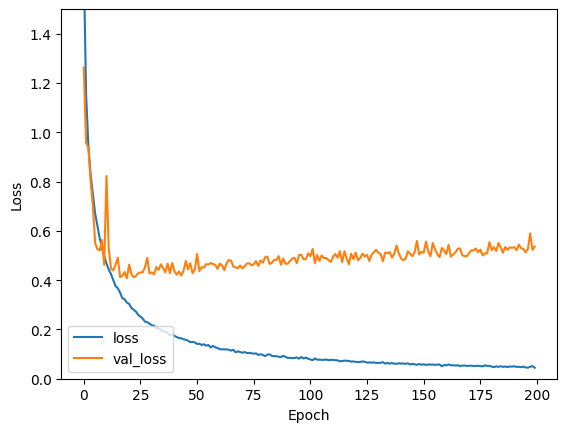

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='lower left')
plt.show()

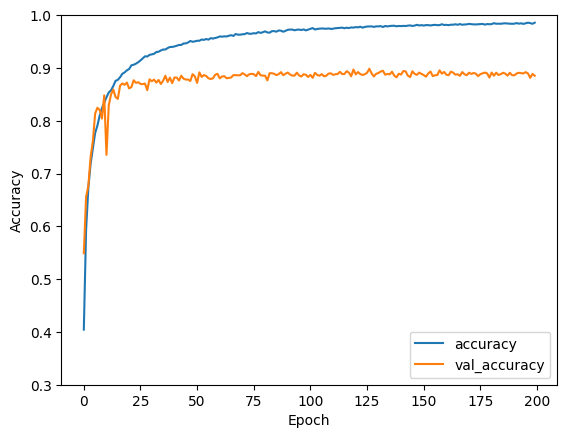

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()